# Libaries importation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pywt

# Data loading

In [2]:
Primary_Data = pd.read_csv('Newdata.csv', header=0, infer_datetime_format=True, parse_dates=['Date'], index_col=['Date'])
Primary_Data.shape

C:\Users\HBK\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(92225, 27)

In [3]:
Data = Primary_Data['ETU.1'].replace(0, 1e-10)  # There cannot be 0, so replace all 0 with a very small number first
Data = np.array(Data)  # Convert Dataframe to array
Data = Data.tolist()  # Convert to list

# Wavelet transform

In [4]:
w = pywt.Wavelet('sym6')  #Selection method
maxlev = pywt.dwt_max_level(len(Data), w.dec_len)
print("maximum level is " + str(maxlev)) #Select the maximum value

threshold = 0.03  #Filter Threshold
level = 2  #Filtering degree (need to be less than the maximum value)
coeffs = pywt.wavedec(Data, 'sym6', level=level) # Wavelet decomposition


maximum level is 13


In [5]:
plt.figure()
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i])) # Filter noise

datarec = pywt.waverec(coeffs, 'sym6')  # Reconstruct the signal with wavelet


<Figure size 432x288 with 0 Axes>

# Plot 

<Figure size 432x288 with 0 Axes>

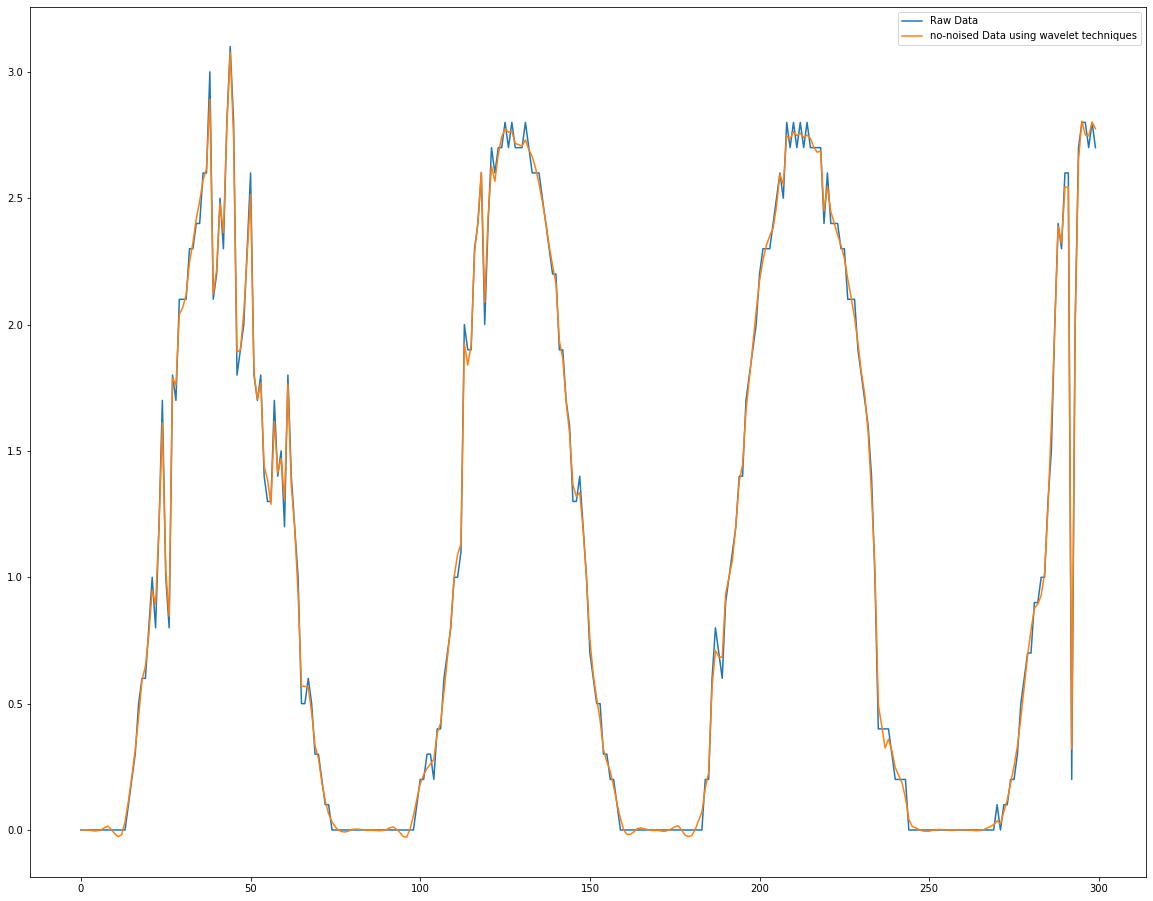

In [6]:
plt.clf()
plt.figure(figsize=(20,16))
plt.plot(Data[:300], label='Raw Data')
plt.plot(datarec[:300], label='no-noised Data using wavelet techniques')
plt.legend()
plt.show()
plt.close()